# Parallel Workflow

In [31]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [32]:
class BatsmanState(TypedDict):

    runs : int
    balls : int
    fours : int
    sixes: int

    sr : float
    bpb : float
    boundary_percent: float
    summary: str

In [33]:
# Creating the caculate_sr_node function

def caculate_sr_func(state: BatsmanState):

    sr = (state["runs"]/state["balls"])*100

    state['sr'] = sr

    return { "sr" : sr }

In [34]:
# Creating the calculate_bpb_func function

def calculate_bpb_func(state: BatsmanState):

    bpb = state["balls"]/(state["fours"] + state["sixes"])

    state['bpb'] = bpb

    return { "bpb" : bpb }

In [35]:
# Defining calculate_boundary_percent_func function

def calculate_boundary_percent_func(state: BatsmanState):

    boundary_percent = ( ( (state['fours']*4) + (state['sixes']*6) ) / (state['runs']))*100

    state['boundary_percent'] = boundary_percent

    return { "boundary_percent" : boundary_percent }

In [44]:
# Defining summary function 

def summary_func(state: BatsmanState) -> BatsmanState:

    summary = f"""
    Strike Rate - {state["sr"]}
    Balls Per Boundary - {state['bpb']}
    Boundary Percent - {state["boundary_percent"]}
    """

    state['summary'] = summary

    return state

In [45]:
# Creating Graph
batsman_graph = StateGraph(BatsmanState)

# Adding Nodes
batsman_graph.add_node("caculate_sr_node", caculate_sr_func)
batsman_graph.add_node("calculate_bpb__node", calculate_bpb_func)
batsman_graph.add_node("calculate_boundary_percent__node", calculate_boundary_percent_func)
batsman_graph.add_node("summary_node", summary_func)

# Adding Edges
batsman_graph.add_edge(START, "caculate_sr_node")
batsman_graph.add_edge(START, "calculate_bpb__node")
batsman_graph.add_edge(START, "calculate_boundary_percent__node")

batsman_graph.add_edge("caculate_sr_node", "summary_node")
batsman_graph.add_edge("calculate_bpb__node", "summary_node")
batsman_graph.add_edge("calculate_boundary_percent__node", "summary_node")

batsman_graph.add_edge("summary_node", END)

# Compile Graph
workflow = batsman_graph.compile()

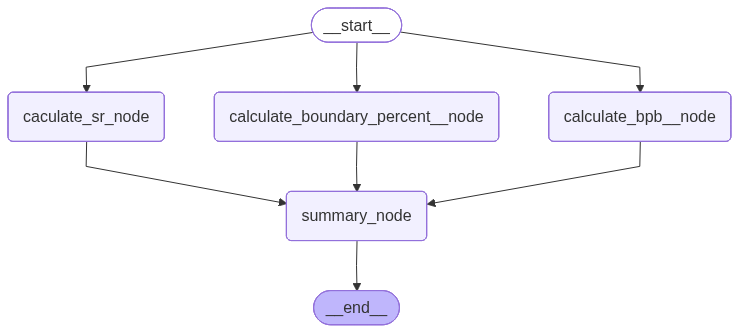

In [46]:
workflow

In [43]:
initial_state = {
    "runs": 150,
    "balls": 50, 
    "fours": 12,
    "sixes": 8
}

final_state = workflow.invoke(initial_state)
final_state

{'runs': 150,
 'balls': 50,
 'fours': 12,
 'sixes': 8,
 'sr': 300.0,
 'bpb': 2.5,
 'boundary_percent': 64.0,
 'summary': '\n    Strike Rate - 300.0 "\n"\n    Balls Per Boundary - 2.5\n\n    Boundary Percent - 64.0\n\n    '}